In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart failure.csv')

In [3]:
df.head()


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

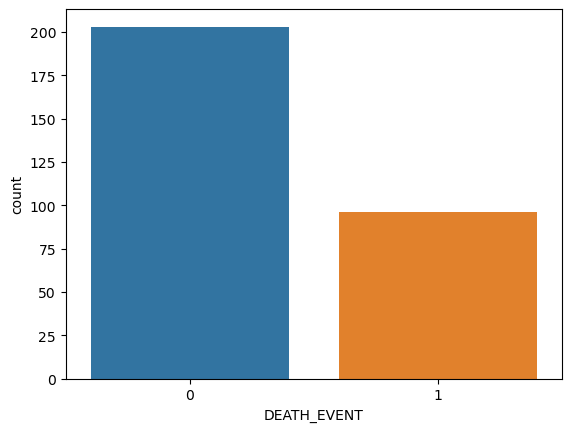

In [4]:
sns.countplot(x = 'DEATH_EVENT', data=df)          #relation

In [5]:
df.describe()                    #find the data information

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

<AxesSubplot:>

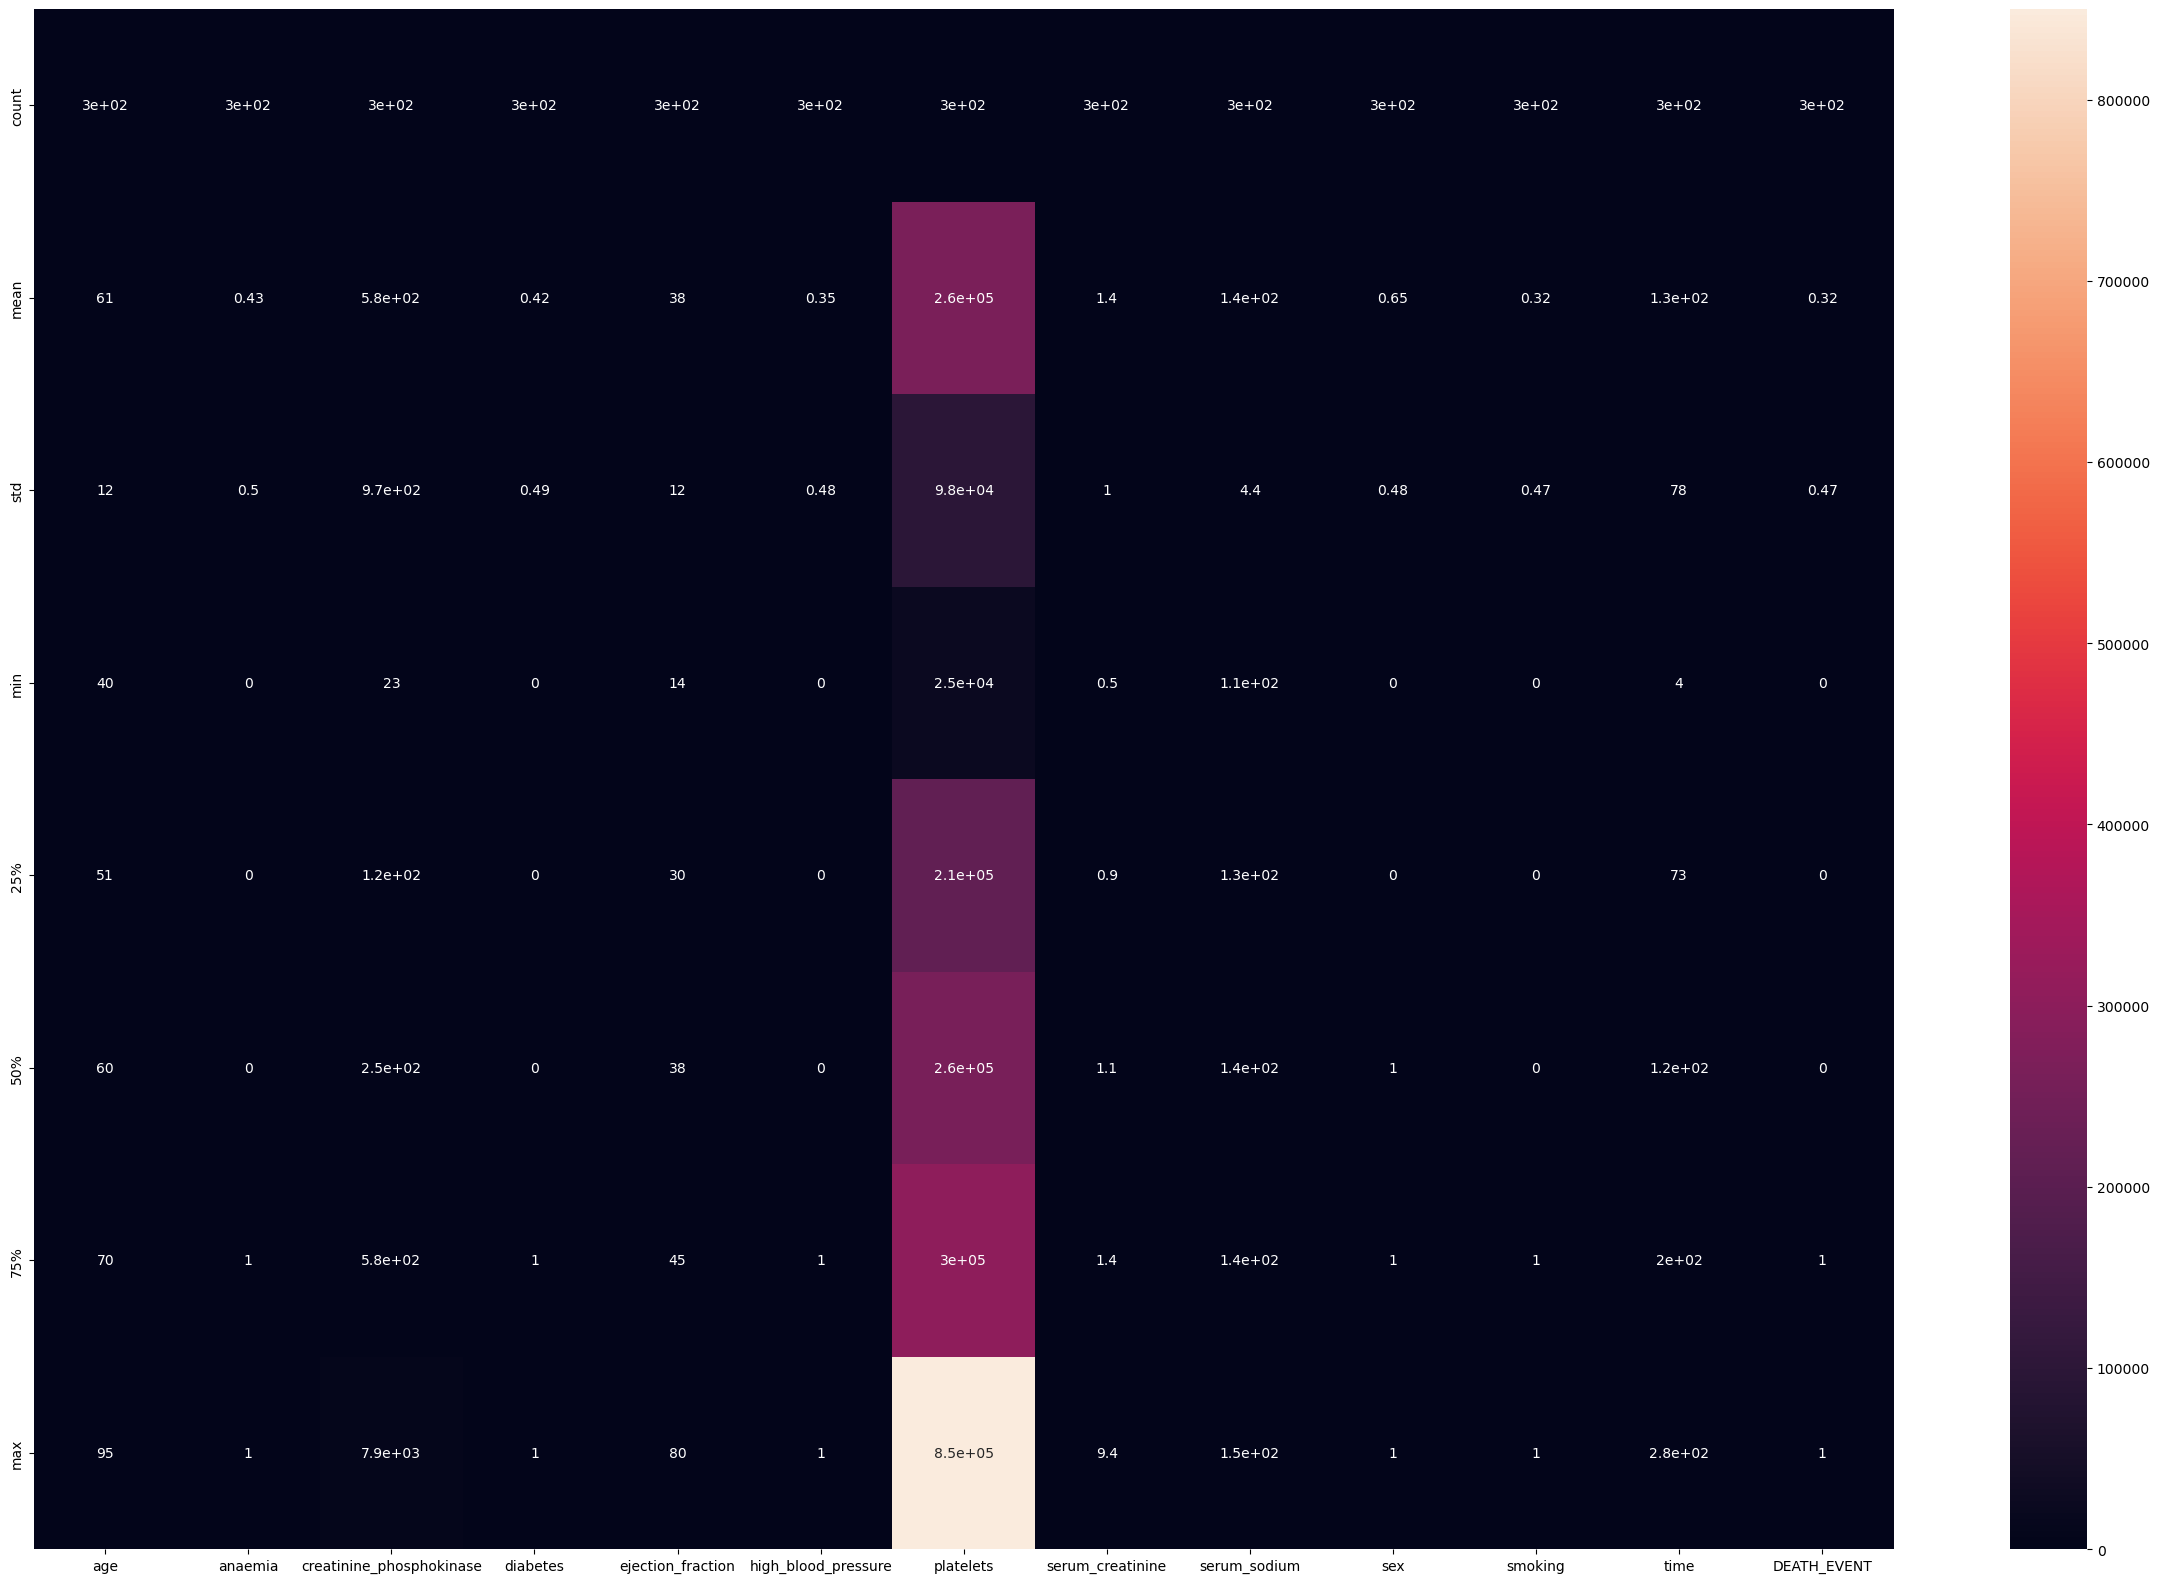

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(30, 20))
sns.heatmap(df.describe(), annot=True)             #using heatmap

In [7]:
df.nunique()                      #find unique value

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

<AxesSubplot:xlabel='diabetes', ylabel='count'>

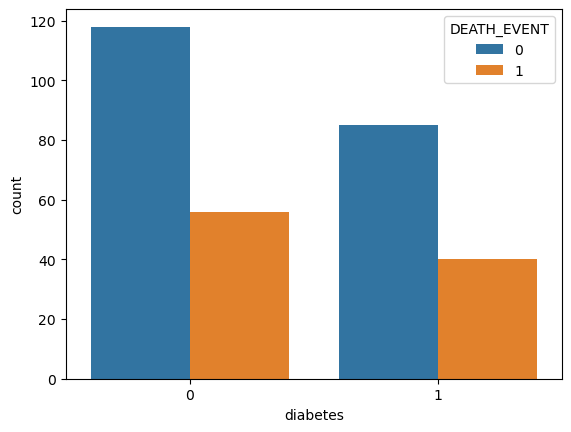

In [8]:
sns.countplot(x ='diabetes', hue = 'DEATH_EVENT', data=df)          #find the diabetes value with respect to death event

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

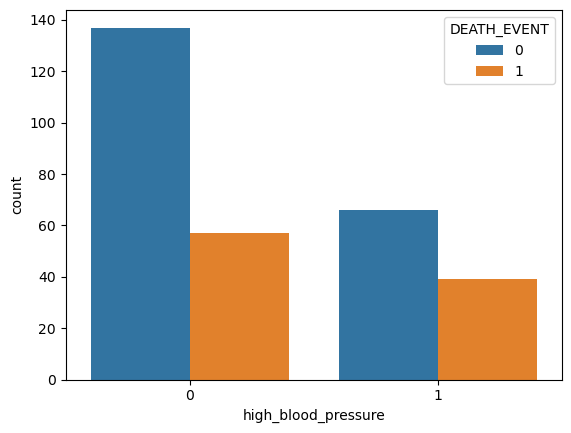

In [9]:
sns.countplot(x ='high_blood_pressure', hue = 'DEATH_EVENT', data=df) 

In [10]:
df.shape


(299, 13)

<AxesSubplot:xlabel='serum_creatinine', ylabel='count'>

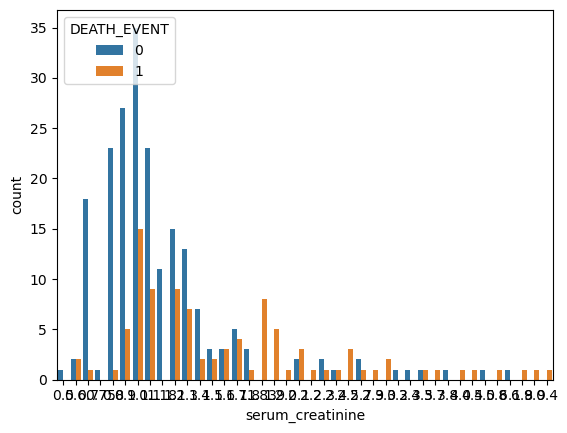

In [11]:
sns.countplot(x ='serum_creatinine', hue = 'DEATH_EVENT', data=df) 

In [12]:
x = df.drop('DEATH_EVENT', axis=1)

In [13]:
y = df['DEATH_EVENT']

In [14]:
from sklearn.model_selection import train_test_split 

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30, random_state=1)           #train_size=.70


In [16]:
xtrain.shape

(209, 12)

In [17]:
xtrain


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
14   49.0        1                        80         0                 30   
210  70.0        0                       212         1                 17   
236  75.0        0                       119         0                 50   
44   60.0        1                       588         1                 60   
163  50.0        1                      2334         1                 35   
..    ...      ...                       ...       ...                ...   
203  60.0        0                        59         0                 25   
255  52.0        1                       191         1                 30   
72   85.0        0                      5882         0                 35   
235  77.0        1                       109         0                 50   
37   82.0        1                       855         1                 50   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
14                     1   427000.0               1.0           138    0   
210                    1   389000.0               1.0           136    1   
236                    1   248000.0               1.1           148    1   
44                     0   194000.0               1.1           142    0   
163                    0    75000.0               0.9           142    0   
..                   ...        ...               ...           ...  ...   
203                    1   212000.0               3.5           136    1   
255                    1   334000.0               1.0           142    1   
72                     0   243000.0               1.0           132    1   
235                    1   406000.0               1.1           137    1   
37                     1   321000.0               1.0           145    0   

     smoking  time  
14         0    12  
210        1   188  
236        0   209  
44         0    33  
163        0   126  
..       ...   ...  
203        1   187  
255        1   216  
72         1    72  
235        0   209  
37         0    30  

[209 rows x 12 columns]

In [18]:
df.shape

(299, 13)

In [19]:
xtest.shape


(90, 12)

In [20]:
xtrain.shape

(209, 12)

In [21]:
ytest.shape

(90,)

In [22]:
ytrain.shape

(209,)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf = DecisionTreeClassifier()

In [25]:
clf.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [26]:
pred = clf.predict(xtest)              #predicted y by testing x value
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [27]:
len(pred)

90

In [28]:
import numpy as np                 #actual ytest
np.array(ytest)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [29]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix, roc_curve, recall_score, f1_score, plot_roc_curve, roc_auc_score

In [30]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        64
           1       0.71      0.58      0.64        26

    accuracy                           0.81        90
   macro avg       0.78      0.74      0.76        90
weighted avg       0.80      0.81      0.80        90



In [31]:
cm =  confusion_matrix(ytest, pred)

In [32]:
cm

array([[58,  6],
       [11, 15]], dtype=int64)

In [33]:
clf.score(xtest, ytest)

0.8111111111111111

In [34]:
 accuracy_score(ytest, pred)

0.8111111111111111

In [35]:
tp, fn, fp, tn =   confusion_matrix(ytest, pred).reshape(-1)

In [36]:
tp

58

In [37]:
tn

15

In [38]:
fp

11

In [39]:
fn

6

In [40]:
(tp+tn) / (tp+tn+fp+fn)

0.8111111111111111

<AxesSubplot:>

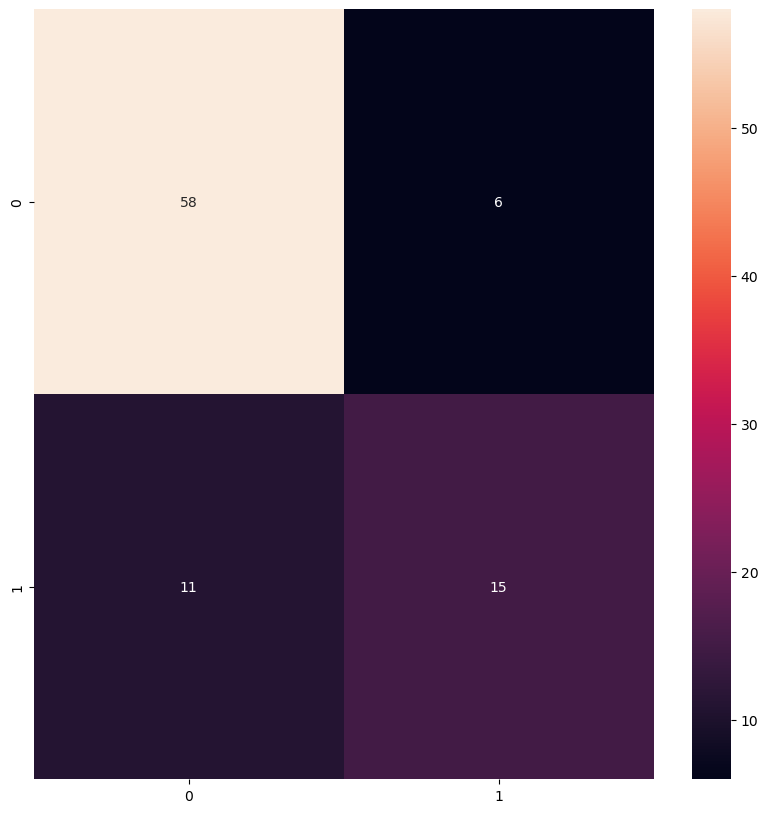

In [41]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)   

In [42]:
df.corr()

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

<AxesSubplot:>

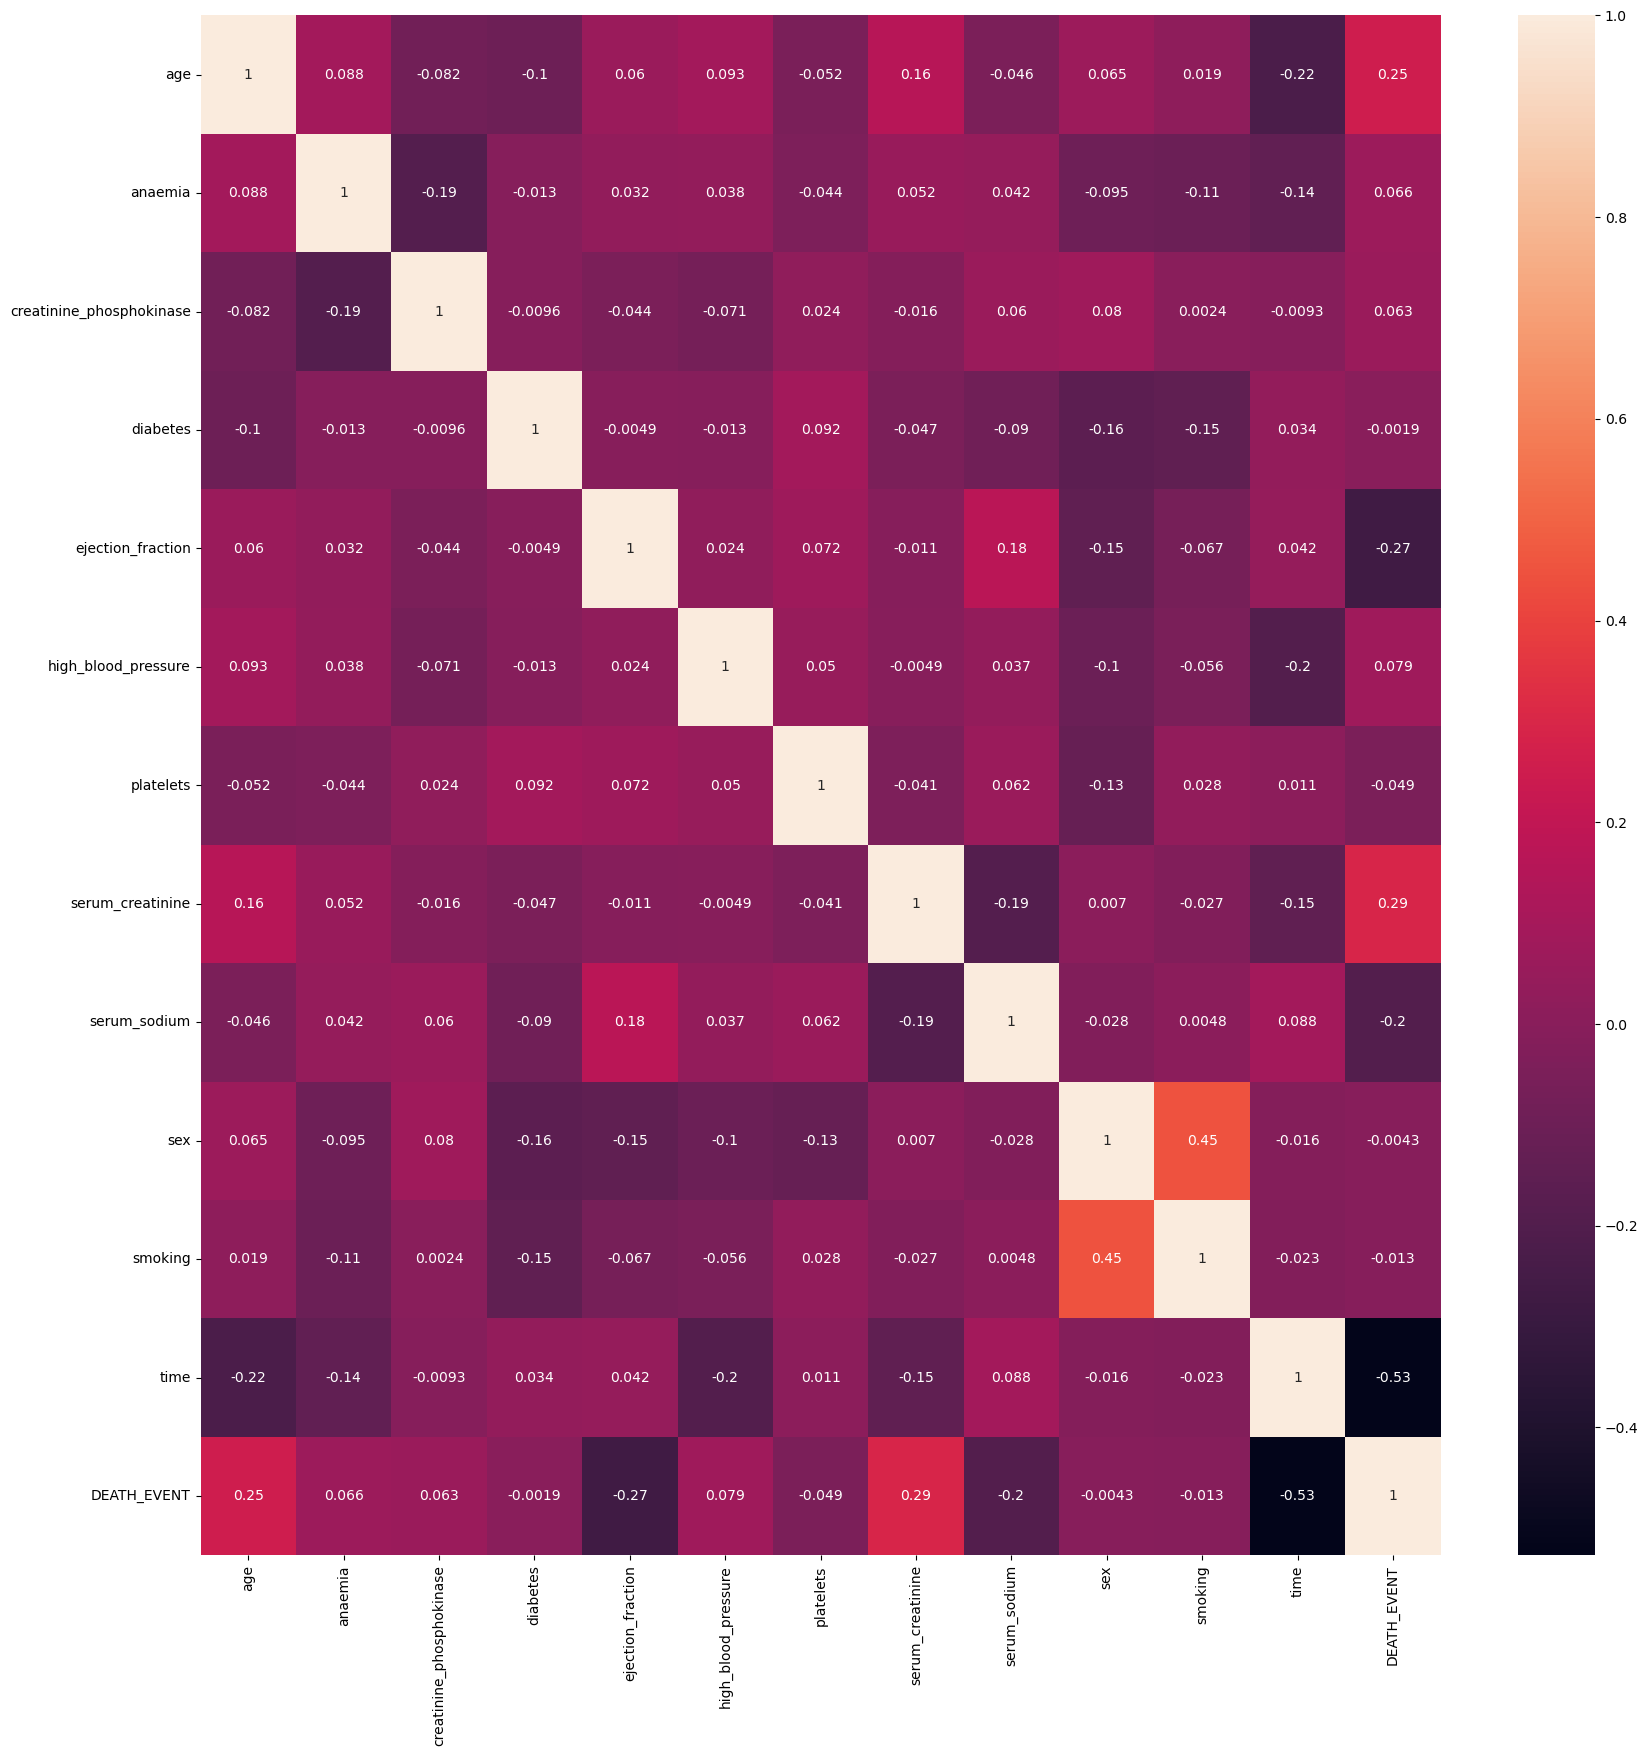

In [43]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)   

# ROC Curve

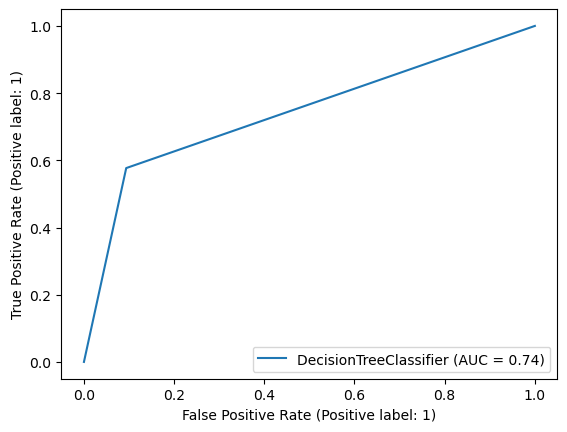

In [44]:
plot_roc_curve(clf, xtest, ytest)

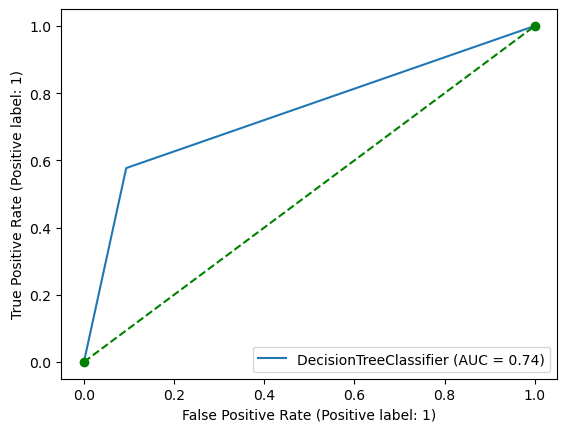

In [45]:
plot_roc_curve(clf, xtest, ytest)
plt.plot([0,1],[0,1], 'go--')

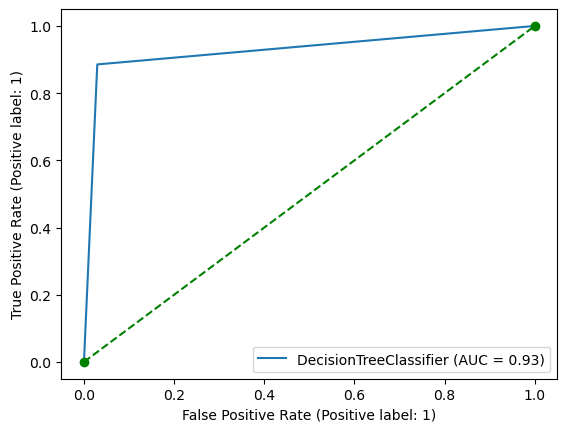

In [46]:
plot_roc_curve(clf, x, y)
plt.plot([0,1],[0,1], 'go--')

In [47]:
clf.score(x,y)

0.9431438127090301

# Precision or Positive Predictive value (PPV):

In [48]:
PPV = (tp)/(tp+fp)
PPV

0.8405797101449275

# Sensitivity,Recall ,Hit rate, or True Positive rate(TPR)

In [49]:
TPR = (tp)/(tp+fp)
TPR

0.8405797101449275

# False Positive rate (FPR) or 1-Specificity

In [50]:
FPR = (fp)/(fp+tn)
FPR

0.4230769230769231

# F1 Measure

In [51]:
f1_measure = (PPV+TPR)/2
f1_measure

0.8405797101449275

# Harmonic Mean,F1 Score

In [52]:
f1_score(ytest,pred)

0.6382978723404256

In [53]:
f1=(2*PPV*TPR)/(PPV+TPR)

In [54]:
f1

0.8405797101449275

# Specificity ,Selectivity or true negative Rate(TNR)

In [55]:
TNR=(tn)/(tn+fp)
TNR

0.5769230769230769

# Threat Score (TS) or Critical Success Index (CSI)

In [56]:
CSI=tp/(tp+fn+fp)
CSI

0.7733333333333333

# False Discovery Rate (FDR)

In [57]:
FDR=(fp)/(tp+fp)
FDR

0.15942028985507245

# Balanced Accuracy (BA)

In [58]:
BA=(TPR+TNR) 
BA

1.4175027870680044

# Information or bookmarker information (BM)

In [59]:
BM=(TPR+TNR-1)
BM

0.41750278706800437

# Markedness(MK) or deltop (DEl-P)

In [60]:
NPV=(tn)/(fn+tn)
MK=PPV+NPV-1
MK

0.5548654244306417

# Matthews correlation coefficient (MCC)

In [61]:
import math

In [62]:
MCC=((tp*tn)-(fp*fn))/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
MCC

0.5177799092282185

# Fowlkes-Mallows Index (FM)

In [63]:
FM=math.sqrt(((tp)/(tp+fp))*((tp)/(tp+fn)))
FM

0.8727974348718267

In [64]:
FM=math.sqrt(PPV*TPR)
FM

0.8405797101449275

# ROC CURVE

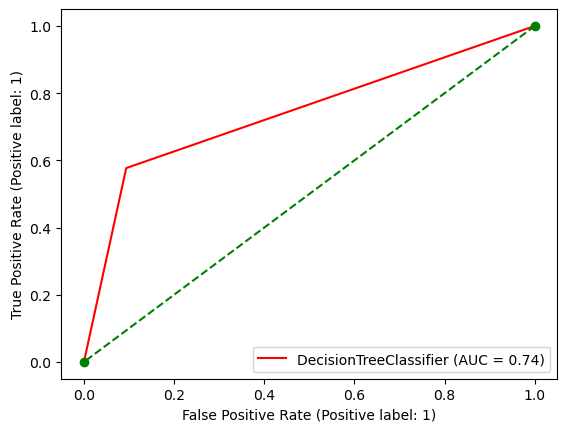

In [65]:
plot_roc_curve(clf, xtest, ytest, color='red')
plt.plot([1,0],[1,0], 'go--')

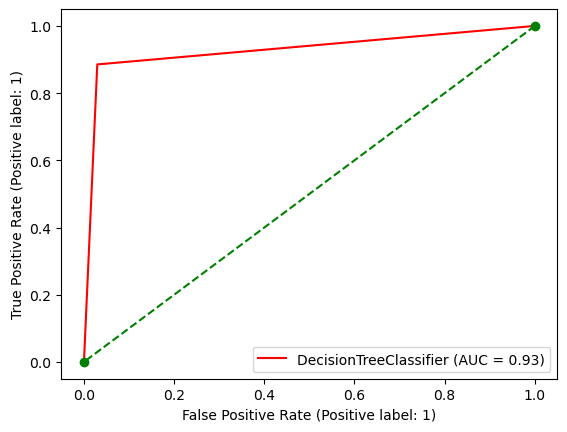

In [66]:
plot_roc_curve(clf,x,y,color='red')
plt.plot([1,0],[1,0],'go--')

In [67]:
clf.score(xtest, ytest)

0.8111111111111111

In [68]:
clf.score(x,y)

0.9431438127090301

In [69]:
roc_auc_score(ytest, pred)

0.7415865384615384